# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Regina Gita Setiari
- **Email:** regina.gsetiari@gmail.com
- **ID Dicoding:** reginag

## Menentukan Pertanyaan Bisnis

- Bagaimana performa logistik memengaruhi kepuasan pelanggan di berbagai kategori produk?
- Berapakah ambang batas (threshold) rasio ongkos kirim terhadap harga total pesanan yang dapat ditoleransi pelanggan sebelum terjadi penurunan signifikan pada skor ulasan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Load dataset customers
cust_df = pd.read_csv("/customers_dataset.csv")

# Tampilkan 5 baris pertama dengan function head
cust_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Insight:**
- Dataset customers menunjukkan informasi pelanggan yang terdiri dari lima kolom meliputi customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, dan customer_state.
- Data tersebut mencakup identifikasi unik untuk setiap pelanggan dan detail lokasi masing-masing pelanggan.

In [3]:
# Load dataset geolocation
geo_df = pd.read_csv("/geolocation_dataset.csv")

# Tampilkan 5 baris pertama dengan function head
geo_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


**Insight:**
- Dataset geolocation menunjukkan informasi lokasi yang terdiri dari lima kolom meliputi geolocation_zip_code_prefix,	geolocation_lat,	geolocation_lng,	geolocation_city,	dan geolocation_state.
- Data tersebut menghubungkan angka depan kode pos dengan titik lokasi (koordinat lintang dan bujur) serta nama daerah (kota dan negara bagian).


In [4]:
# Load dataset order items
order_items_df = pd.read_csv("/order_items_dataset.csv")

# Tampilkan 5 baris pertama dengan function head
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


**Insight:**
- Dataset order items menunjukkan detail setiap produk yang dibeli dalam sebuah pesanan. Dataset ini terdiri dari tujuh kolom meliputi order_id, order_item_id (nomor urut barang dalam pesanan), product_id, seller_id, shipping_limit_date, price, dan freight_value.
- Data tersebut menghubungkan identitas pesanan dengan identitas produk dan penjual, serta mencatat batas waktu pengiriman, harga barang, dan biaya logistik (freight) untuk masing-masing item pesanan.

In [5]:
# Load dataset order payments
order_payments_df = pd.read_csv("/order_payments_dataset.csv")

# Tampilkan 5 baris pertama dengan function head
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Insight:**
- Dataset order payments menunjukkan detail metode pembayaran yang dipilih pada setiap pesanan. Dataset ini terdiri dari lima kolom meliputi order_id, payment_sequential,	payment_type,	payment_installments, dan payment_value.
- Data tersebut menjabarkan cara pembayaran yang dipilih, jumlah cicilan yang diambil, serta nominal yang dibayarkan.


In [6]:
# Load dataset order reviews
order_reviews_df = pd.read_csv("/order_reviews_dataset.csv")

# Tampilkan 5 baris pertama dengan function head
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


**Insight:**
- Dataset order reviews menunjukkan review pengalaman berbelanja pelanggan pada setiap pesanan. Dataset ini terdiri dari tujuh kolom meliputi review_id, order_id, review_score,	review_comment_title,	review_comment_message, review_creation_date, dan review_answer_timestamp.
- Data tersebut menjabarkan review pelanggan mulai dari skor kepuasan, judul dan komentar, hingga tanggal penulisan review untuk setiap pesanan.


In [7]:
# Load dataset orders
orders_df = pd.read_csv("/orders_dataset.csv")

# Tampilkan 5 baris pertama dengan function head
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**Insight:**
- Dataset orders menunjukkan informasi pesanan yang terdiri dari delapan kolom meliputi order_id,	customer_id,	order_status,	order_purchase_timestamp,	order_approved_at,	order_delivered_carrier_date,	order_delivered_customer_date, dan order_estimated_delivery_date.
- Data tersebut menghubungkan identitas pesanan dengan identitas pelanggan serta menjabarkan status pesanan dan detail waktu pemrosesan, mulai dari pembelian, pembayaran diterima, pengiriman ke kurir, hingga detail waktu pesanan sampai di tangan pelanggan.

In [8]:
# Load dataset product category name translation
product_cat_df = pd.read_csv("/product_category_name_translation.csv")

# Tampilkan 5 baris pertama dengan function head
product_cat_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**
- Dataset product category name translation menunjukkan informasi nama produk dalam bahasa Inggris.
- Dataset ini hanya terdiri dari dua kolom yaitu product_category_name dan product_category_name_english.

In [9]:
# Load dataset products
products_df = pd.read_csv("/products_dataset.csv")

# Tampilkan 5 baris pertama dengan function head
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Insight:**
- Dataset products menunjukkan informasi produk yang terdiri dari sembilan kolom meliputi product_id,	product_category_name,	product_name_lenght,	product_description_lenght,	product_photos_qty,	product_weight_g,	product_length_cm,	product_height_cm, dan product_width_cm.
- Data tersebut menjabarkan detail produk seperti kategori produk, informasi dasar produk (jumlah karakter nama produk, deskripsi, dan jumlah foto), serta berat dan dimensi produk.

In [10]:
# Load dataset sellers
sellers_df = pd.read_csv("/sellers_dataset.csv")

# Tampilkan 5 baris pertama dengan function head
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Dataset sellers menunjukkan informasi penjual yang terdiri dari empat kolom meliputi seller_id,	seller_zip_code_prefix,	seller_city, dan	seller_state.
- Data tersebut mencakup identitas unik setiap penjual serta lokasi penjual berada mulai dari kode pos, kota, hingga negara bagian.

### Assessing Data

#### Assessing Data customers

In [11]:
# Periksa tipe data dari tiap kolom dengan menggunakan method info()
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [12]:
# Periksa duplikasi dan ringkasan parameter statistik dari kolom numerik
print("Jumlah duplikasi: ", cust_df.duplicated().sum())
cust_df.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**Insight:**
- Tidak ditemukan missing value dan duplikasi data pada deteksi awal.
- Kolom customer_zip_code_prefix tidak memiliki makna statistik. Kolom tersebut merupakan data kategorikal/identifier, bukan numerik. Maka, penyesuaian tipe data diperlukan.
- Rentang kolom customer_zip_code_prefix memiliki nilai yang wajar (berdasarkan aturan format CEP Brazil). Namun, perlu sedikit pemformatan data karena beberapa nilai yang muncul hanya sejumlah empat digit akibat hilangnya angka nol di depan saat disimpan sebagai bilangan bulat.

#### Assessing Data geolocation

In [13]:
# Periksa tipe data dari tiap kolom dengan menggunakan method info()
geo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [14]:
# Periksa duplikasi dan ringkasan parameter statistik dari kolom numerik
print("Jumlah duplikasi: ", geo_df.duplicated().sum())
geo_df.describe()

Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


**Insight:**
- Tidak ditemukan missing value pada deteksi awal.
- Terdapat 261.831 duplikasi data yang memerlukan pembersihan.
- Kolom geolocation_zip_code_prefix tidak memiliki makna statistik. Kolom tersebut sebaiknya diperlakukan penyesuaian tipe data sebagai data kategorikal/identifier, bukan numerik.
- Kolom geolocation_zip_code_prefix juga perlu sedikit pemformatan data karena beberapa nilai yang muncul hanya sejumlah empat digit akibat hilangnya angka nol di depan saat disimpan sebagai bilangan bulat.

#### Assessing Data order items

In [15]:
# Periksa tipe data dari tiap kolom dengan menggunakan method info()
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [16]:
# Periksa duplikasi dan ringkasan parameter statistik dari kolom numerik
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())
order_items_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Insight:**
- Tidak ditemukan missing value dan duplikasi data pada deteksi awal.
- Kolom shipping_limit_date masih bertipe object dan perlu dikonversi ke datetime untuk analisis berbasis waktu.
- Kolom order_item_id merupakan identifier urutan item,
bukan variabel numerik untuk analisis statistik sehingga tipe datanya juga perlu dikonversi.
- Terdapat nilai minimum 0 pada kolom freight_value. Hal ini teridentifikasi sebagai anomali, mengingat pengiriman barang umumnya memerlukan biaya logistik. Nilai tersebut memerlukan analisa lebih lanjut untuk mengetahui apakah nilai bersifat wajar atau tidak lengkap.


#### Assessing Data order payments

In [17]:
# Periksa tipe data dari tiap kolom dengan menggunakan method info()
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [18]:
# Periksa duplikasi dan ringkasan parameter statistik dari kolom numerik
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())
order_payments_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


**Insight:**
- Tidak ditemukan missing value dan duplikasi data pada deteksi awal.
- Kolom payment_sequential merupakan identifier urutan  metode pembayaran (misal: bayar pakai 2 kartu berbeda), bukan variabel numerik untuk analisis statistik sehingga tipe datanya perlu dikonversi.
- Kolom payment_installments dan payment_value memiliki nilai minimum 0. Nilai tersebut merupakan anomali karena tidak mungkin ada transaksi yang nilainya 0 dan cicilan minimal itu 1 (bayar lunas).


#### Assessing Data order reviews

In [19]:
# Periksa tipe data dari tiap kolom dengan menggunakan method info()
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [20]:
# Pastikan adanya missing values
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [21]:
# Periksa duplikasi dan ringkasan parameter statistik dari kolom numerik
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())
order_reviews_df.describe()

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


**Insight:**
- Tidak ditemukan duplikasi data pada deteksi awal.
- Terdapat  missing value data pada kolom review_comment_title (87.656) dan review_comment_message (58.247) yang perlu ditangani lebih lanjut.
- Kolom review_creation_date dan review_answer_timestamp masih bertipe object dan perlu dikonversi ke datetime untuk analisis berbasis waktu.



#### Assessing Data orders

In [22]:
# Periksa tipe data dari tiap kolom dengan menggunakan method info()
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [23]:
# Pastikan adanya missing values
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [24]:
# Periksa duplikasi dan ringkasan parameter statistik dataset
print("Jumlah duplikasi: ", orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:06:07,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**Insight:**
- Tidak ditemukan duplikasi data pada deteksi awal.
- Terdapat missing value data pada kolom order_approved (160), order_delivered_carrier_date (1.783), dan
order_delivered_customer_date (2.965) yang perlu ditangani lebih lanjut.
- Kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date  masih bertipe object dan perlu dikonversi ke datetime untuk analisis berbasis waktu.


#### Assessing Data product category name translation

In [25]:
# Periksa tipe data dari tiap kolom dengan menggunakan method info()
product_cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [26]:
# Periksa duplikasi dan ringkasan parameter statistik dataset
print("Jumlah duplikasi: ", product_cat_df.duplicated().sum())
product_cat_df.describe()

Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


**Insight:**
- Tidak terdapat masalah tipe data untuk setiap kolom pada dataset product_cat_df.
- Tidak ditemukan missing value dan duplikasi data pada deteksi awal.
- Tidak terdapat keanehan dalam ringkasan parameter statistik pada dataset product_cat_df.

#### Assessing Data products

In [27]:
# Periksa tipe data dari tiap kolom dengan menggunakan method info()
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [28]:
# Pastikan adanya missing values
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [29]:
# Periksa duplikasi dan ringkasan parameter statistik dari kolom numerik
print("Jumlah duplikasi: ", products_df.duplicated().sum())
products_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Insight:**
- Tidak ditemukan duplikasi data pada deteksi awal.
- Terdapat 610 missing value data pada kolom product_category_name, product_name_lenght, product_description_lenght, dan product_photos_qty.
- Terdapat 2 missing value data pada kolom product_weight_g, product_length_cm, product_height_cm, dan product_width_cm.
- Kolom product_weight_g mengandung anomali dengan nilai minimum 0. Secara logika, barang tidak mungkin beratnya 0 gram. Oleh karena itu, perlu analisis lebih lanjut terhadap kondisi tersebut.
- Kolom product_photos_qty, product_name_lenght, dan product_description_lenght juga memerlukan penyesuaian tipe data karena kolom tersebut merupakan bilangan bulat (integer). Sebagai contoh, tidak mungkin ada nilai "1,5 foto".


#### Assessing Data sellers

In [30]:
# Periksa tipe data dari tiap kolom dengan menggunakan method info()
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [31]:
# Periksa duplikasi dan ringkasan parameter statistik dari kolom numerik
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())
sellers_df.describe()

Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Insight:**
- Tidak ditemukan missing value dan duplikasi data pada deteksi awal.
- Kolom seller_zip_code_prefix tidak memiliki makna statistik. Kolom tersebut merupakan data kategorikal/identifier. Maka, penyesuaian tipe data diperlukan.
- Rentang kolom seller_zip_code_prefix memiliki nilai yang wajar (berdasarkan aturan format CEP Brazil). Namun, perlu sedikit pemformatan data karena beberapa nilai yang muncul hanya sejumlah empat digit akibat hilangnya angka nol di depan saat disimpan sebagai bilangan bulat.

### Cleaning Data

#### Cleaning Data customers

In [32]:
# Ubah tipe data pada kolom customer_zip_code_prefix menjadi string
cust_df['customer_zip_code_prefix'] = (
    cust_df['customer_zip_code_prefix']
      .astype(str)
)

# Periksa kembali tipe data
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  object
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


In [33]:
# Format customer_zip_code_prefix menjadi 5 digit dengan penambahan angka nol di sebelah kiri data awal
cust_df['customer_zip_code_prefix'] = (
    cust_df['customer_zip_code_prefix']
      .str.zfill(5)
)

# Periksa hasil pemformatan
cust_df['customer_zip_code_prefix']

,customer_zip_code_prefix
0,14409
1,09790
2,01151
3,08775
4,13056
...,...
99436,03937
99437,06764
99438,60115
99439,92120


**Insight:**
- Kolom customer_zip_code_prefix telah disesuaikan tipe datanya menjadi string.
- Pemformatan kolom customer_zip_code_prefix menjadi lima digit (dengan penambahan angka nol di depan) juga telah dilakukan .

#### Cleaning Data geolocation

In [34]:
# Ubah tipe data pada kolom geolocation_zip_code_prefix menjadi string
geo_df['geolocation_zip_code_prefix'] = (
    geo_df['geolocation_zip_code_prefix']
      .astype(str)
)

# Periksa kembali tipe data
geo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  object 
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), object(3)
memory usage: 38.2+ MB


In [35]:
# Format geolocation_zip_code_prefix menjadi 5 digit dengan penambahan angka nol di sebelah kiri data awal
geo_df['geolocation_zip_code_prefix'] = (
    geo_df['geolocation_zip_code_prefix']
      .str.zfill(5)
)

# Periksa hasil pemformatan
geo_df['geolocation_zip_code_prefix']

,geolocation_zip_code_prefix
0,01037
1,01046
2,01046
3,01041
4,01035
...,...
1000158,99950
1000159,99900
1000160,99950
1000161,99980


In [36]:
# Lihat data yang terduplikasi berdasarkan kolom zip_code_prefix saja
geo_df[geo_df.duplicated(subset=['geolocation_zip_code_prefix'], keep=False)]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,01037,-23.545621,-46.639292,sao paulo,SP
1,01046,-23.546081,-46.644820,sao paulo,SP
2,01046,-23.546129,-46.642951,sao paulo,SP
3,01041,-23.544392,-46.639499,sao paulo,SP
4,01035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [37]:
# Penanganan duplikasi dengan mengambil nilai rata-rata lat dan lng pada tiap zip_code_prefix
geo_df_grouped = (
    geo_df
      .groupby('geolocation_zip_code_prefix')
      .agg({
          'geolocation_lat': 'mean',
          'geolocation_lng': 'mean',
          'geolocation_city': 'first',  # Ambil nama kota pertama yang muncul
          'geolocation_state': 'first'   # Ambil nama negara bagian pertama yang muncul
      })
      .reset_index()
)

# Periksa kembali apakah masih terdapat duplikasi pada data
print("Jumlah duplikasi: ", geo_df_grouped.duplicated().sum())

# Tampilkan hasil penanganan duplikasi data
geo_df_grouped.head()

Jumlah duplikasi:  0


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,01001,-23.550190,-46.634024,sao paulo,SP
1,01002,-23.548146,-46.634979,sao paulo,SP
2,01003,-23.548994,-46.635731,sao paulo,SP
3,01004,-23.549799,-46.634757,sao paulo,SP
4,01005,-23.549456,-46.636733,sao paulo,SP


**Insight:**
- Kolom geolocation_zip_code_prefix telah disesuaikan tipe datanya menjadi string.

- Pemformatan kolom geolocation_zip_code_prefix menjadi lima digit (dengan penambahan angka nol di depan) juga telah dilakukan.

- Duplikasi kolom geolocation_zip_code_prefix wajar, karena satu awalan kode pos dapat muncul pada banyak alamat yang tentunya memiliki titik koordinat berbeda-beda. Penanganannya dilakukan dengan mengambil nilai tengah dari semua koordinat yang ada sebagai representasi nilai untuk tiap kode pos. Data tersebut disimpan dalam variabel baru geo_df_grouped.


#### Cleaning Data order items

In [38]:
# Ubah tipe data pada kolom shipping_limit_date menjadi datetime
order_items_df['shipping_limit_date'] = (
    pd.to_datetime(order_items_df['shipping_limit_date'])
)

# Periksa kembali tipe data
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [39]:
# Ubah tipe data pada kolom order_item_id menjadi string
order_items_df['order_item_id'] = (
    order_items_df['order_item_id']
      .astype(str)
)

# Periksa kembali tipe data
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  object        
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 6.0+ MB


In [40]:
# Lihat data dengan freight_value bernilai 0
order_items_df[order_items_df['freight_value'] == 0]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
114,00404fa7a687c8c44ca69d42695aae73,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-15 04:31:26,99.9,0.0
258,00a870c6c06346e85335524935c600c0,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-05-14 00:14:29,69.9,0.0
483,011c899816ea29773525bd3322dbb6aa,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-07 05:30:45,99.9,0.0
508,012b3f6ab7776a8ab3443a4ad7bef2e6,1,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-05-09 21:30:50,53.9,0.0
509,012b3f6ab7776a8ab3443a4ad7bef2e6,2,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-05-09 21:30:50,53.9,0.0
...,...,...,...,...,...,...,...
111094,fc698f330ec7fb74859071cc6cb29772,1,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-04-25 02:31:57,53.9,0.0
111497,fd4907109f6bac23f07064af84bec02d,1,7a10781637204d8d10485c71a6108a2e,4869f7a5dfa277a7dca6462dcf3b52b2,2018-04-30 11:31:32,219.0,0.0
111649,fd95e4b85ebbb81853d4a6be3d61432b,1,53b36df67ebb7c41585e8d54d6772e08,4869f7a5dfa277a7dca6462dcf3b52b2,2018-05-04 11:10:31,106.9,0.0
112182,fee19a0dc7358b6962a611cecf6a37b4,1,f1c7f353075ce59d8a6f3cf58f419c9c,37be5a7c751166fbc5f8ccba4119e043,2017-09-07 22:06:31,195.0,0.0


In [41]:
# Periksa statistik price untuk kelompok freight_value lebih dari 0 atau sama dengan 0
order_items_df.groupby(order_items_df['freight_value'] == 0)['price'].describe()

,count,mean,std,min,25%,50%,75%,max
freight_value,,,,,,,,
False,112267.0,120.728970,183.919245,0.85,39.9,74.9,134.99,6735.0
True,383.0,98.601488,50.004247,53.90,69.9,99.9,106.90,712.9


In [42]:
# Periksa statistik shipping_limit_date untuk kelompok freight_value lebih dari 0 atau sama dengan 0
order_items_df.groupby(order_items_df['freight_value'] == 0)['shipping_limit_date'].describe()


,count,mean,min,25%,50%,75%,max
freight_value,,,,,,,
False,112267,2018-01-07 06:17:30.524499712,2016-09-19 00:15:34,2017-09-20 12:10:26.500000,2018-01-25 20:57:58,2018-05-10 13:30:30,2020-04-09 22:35:08
True,383,2018-05-01 12:19:47.133159424,2017-08-31 02:24:30,2018-05-01 09:43:46.500000,2018-05-08 20:53:47,2018-05-14 04:55:37,2018-08-30 21:04:01


In [43]:
# Periksa hubungan freight_value dengan kategori produk
# Tampung data order items yang ongkirnya 0 dalam variabel free_shipping_df
free_shipping_df = (
    order_items_df[order_items_df['freight_value'] == 0]
)

# Tampung kolom produk id dan kategori dalam variabel category_df
category_df = (
    products_df[['product_id', 'product_category_name']]
)

# Gabungkan (join) data untuk mengetahui kategori produk yang ongkirnya 0
free_shipping_with_category = (
    free_shipping_df
      .merge(
        category_df,
        on='product_id',
        how='left'
      )
)

# Hitung jumlah data dengan ongkir 0 pada tiap kategori
free_shipping_with_category['product_category_name'].value_counts()

,count
product_category_name,
relogios_presentes,214
moveis_decoracao,98
ferramentas_jardim,56
cama_mesa_banho,9
livros_importados,1
beleza_saude,1
moveis_escritorio,1
automotivo,1


In [44]:
# Penanganan freight_value bernilai 0 dengan metode flagging
# Buat kolom baru bernama free_shipping sebagai penanda apakah order item tersebut bebas ongkir atau tidak
order_items_df['free_shipping'] = (
    (order_items_df['freight_value'] == 0)
      .astype(int)
)

# Periksa ringkasan parameter statistik terbaru dari dataset order_items_df
order_items_df.describe()

,shipping_limit_date,price,freight_value,free_shipping
count,112650,112650.000000,112650.000000,112650.00000
mean,2018-01-07 15:36:52.192685312,120.653739,19.990320,0.00340
min,2016-09-19 00:15:34,0.850000,0.000000,0.00000
25%,2017-09-20 20:57:27.500000,39.900000,13.080000,0.00000
50%,2018-01-26 13:59:35,74.990000,16.260000,0.00000
75%,2018-05-10 14:34:00.750000128,134.900000,21.150000,0.00000
max,2020-04-09 22:35:08,6735.000000,409.680000,1.00000
std,NaN,183.633928,15.806405,0.05821


**Insight:**
- Tipe data kolom shipping_limit_date telah disesuaikan menjadi datetime untuk analisis berbasis waktu.

- Tipe data kolom order_item_id telah disesuaikan menjadi string.

- Terdapat 383 data dengan nilai freight value , berkisar 0,34% dari keseluruhan data.
  - Secara skala, kelompok gratis ongkos kirim mempunyai rentang harga produk yang lebih sempit dibanding kelompok yang berbayar. Ini menandakan adanya posibilitas, skema di mana hanya produk dengan harga tertentu yang mendapatkan subsidi gratis ongkos kirim.
  - Kuartal 1 (25%) sampai kuartal 3 (75%) penjualan produk terpusat di sekitar Mei 2018.
  - Dari sisi kategori produk, kelompok gratis ongkos kirim terkonsentrasi pada kategori 'relogios_presentes' dan 'moveis_decoracao'.
  
  Beberapa hal tersebut mengindikasikan bahwa gratis ongkos kirim kemungkinan besar merupakan promo musiman dari penjual, dan bukan data yang hilang atau salah (error) yang biasanya memiliki pola acak serta bukan produk digital.
  
- Penanganan data dengan metode flagging dipilih karena nilai ongkos kirim 0 dalam dataset ini teridentifikasi sebagai informasi valid yang merepresentasikan strategi promosi, bukan kesalahan teknis. Menghapus data (drop) akan menghilangkan jejak transaksi nyata, sementara mengganti nilai (imputasi) akan merusak orisinalitas data bisnis. Dengan mempertahankan nilai asli dan menambah kolom free_shipping, integritas data tetap terjaga sekaligus memberikan dimensi baru untuk membedakan perilaku belanja pada transaksi promo dibandingkan transaksi reguler.




#### Cleaning Data order payments

In [45]:
# Ubah tipe data pada kolom payment_sequential menjadi string
order_payments_df['payment_sequential'] = (
    order_payments_df['payment_sequential']
      .astype(str)
)

# Periksa kembali tipe data
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  object 
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 4.0+ MB


In [46]:
# Lihat data dengan payment_value bernilai 0
order_payments_df[order_payments_df['payment_value'] == 0]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
19922,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.0
36822,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.0
43744,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.0
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
62674,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.0
77885,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0
100766,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.0


In [47]:
# Penanganan inaccurate value pada kolom payment_value dengan metode drop
order_payments_df = (
    order_payments_df[order_payments_df['payment_value'] > 0]
      .copy()
)

# Periksa kembali apakah masih terdapat nilai 0 pada kolom payment_value
order_payments_df[order_payments_df['payment_value'] == 0]

,order_id,payment_sequential,payment_type,payment_installments,payment_value


In [48]:
# Lihat data dengan payment_installments bernilai 0
order_payments_df[order_payments_df['payment_installments'] == 0]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
46982,744bade1fcf9ff3f31d860ace076d422,2,credit_card,0,58.69
79014,1a57108394169c0b47d8f876acc9ba2d,2,credit_card,0,129.94


In [49]:
# Penanganan inaccurate value pada kolom payment_installments dengan metode imputasi
order_payments_df['payment_installments'] = (
    order_payments_df['payment_installments']
      .replace(0, 1)
)

# Periksa kembali apakah masih terdapat nilai 0 pada kolom payment_installments
order_payments_df[order_payments_df['payment_installments'] == 0]

,order_id,payment_sequential,payment_type,payment_installments,payment_value


**Insight:**
- Tipe data kolom payment_sequential telah disesuaikan menjadi string.

- Baris dengan payment_value bernilai 0 dihapus dari dataset guna menjaga akurasi analisis rata-rata transaksi. Nilai 0 pada status not_defined dianggap sebagai data pencatatan yang tidak valid (noise), sedangkan pada tipe voucher biasanya hanya merepresentasikan sisa pemakaian voucher yang sudah habis.

- Anomali pada payment installments bernilai 0, diubah nilainya menjadi 1. Keputusan ini diambil mengikuti prinsip perbankan, cicilan minimal adalah 1 (bayar penuh/lunas). Sebab lain ialah karena data ini masih memiliki informasi yang bermanfaat dalam analisa ke depannya.



#### Cleaning Data order reviews

In [50]:
# Ubah tipe data pada kolom review_creation_date dan review_answer_timestamp menjadi datetime
datetime_columns = ["review_creation_date",
                    "review_answer_timestamp"]

for column in datetime_columns:
  order_reviews_df[column] = (
      pd.to_datetime(order_reviews_df[column])
  )

# Periksa kembali tipe data
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [51]:
# Lihat missing value data pada kolom review_comment_title untuk menentukan metode mana yang akan digunakan
order_reviews_df[order_reviews_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01,2018-07-02 12:59:13


In [52]:
# Penanganan missing value pada kolom review_comment_title dengan metode imputasi
# Isi review_comment_title dengan 'no_title' sebagai pengganti missing value
order_reviews_df['review_comment_title'] = (
    order_reviews_df['review_comment_title']
      .fillna('no_title')
)

# Periksa kembali apakah masih terdapat missing value
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [53]:
# Lihat missing value data pada kolom review_comment_message untuk menentukan metode mana yang akan digunakan
order_reviews_df[order_reviews_df.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,no_title,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,no_title,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,no_title,NaN,2018-02-17,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,no_title,NaN,2018-04-13,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,no_title,NaN,2017-07-16,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,no_title,NaN,2017-12-13,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,no_title,NaN,2018-04-27,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,no_title,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,no_title,NaN,2017-12-09,2017-12-11 20:06:42


In [54]:
# Penanganan missing value pada kolom review_comment_message dengan metode imputasi
# Isi review_comment_message dengan 'no_message' sebagai pengganti missing value
order_reviews_df['review_comment_message'] = (
    order_reviews_df['review_comment_message']
      .fillna('no_message')
)

# Periksa kembali apakah masih terdapat missing value
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0


**Insight:**
- Tipe data kolom review_creation_date dan review_answer_timestamp telah dikonversi menjadi datetime untuk analisis berbasis waktu.

- Missing value pada kolom review_comment_title sebanyak 87.656 diisi dengan  teks "no_title". Missing value pada kolom review_comment_message sebanyak 58.247 diisi dengan  teks "no_message". Metode ini dipilih karena komentar yang kosong mencapai 58% dari keseluruhan data, sehingga opsi lain seperti menghapus baris data akan menghilangkan informasi krusial seperti price, freight_value, durasi pengiriman, dan review_score.


#### Cleaning Data orders

In [55]:
# Ubah tipe data pada beberapa kolom dalam orders menjadi datetime
datetime_columns = ["order_purchase_timestamp",
                    "order_approved_at",
                    "order_delivered_carrier_date",
                    "order_delivered_customer_date",
                    "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = (
      pd.to_datetime(orders_df[column])
  )

# Periksa kembali tipe data
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [56]:
# Lihat missing value data pada kolom order_approved_at untuk menentukan metode mana yang akan digunakan
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


In [57]:
# Lihat missing value data pada kolom order_delivered_carrier_date untuk menentukan metode mana yang akan digunakan
orders_df[orders_df.order_delivered_carrier_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


In [58]:
# Lihat missing value data pada kolom order_delivered_customer_date untuk menentukan metode mana yang akan digunakan
orders_df[orders_df.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


In [59]:
# Penanganan awal missing value dengan metode filter
# Filter dataset orders dengan order status delivered
orders_df_delivered = (
    orders_df[orders_df['order_status']=='delivered']
      .copy()
)

# Periksa apakah masih terdapat missing value pada orders_df_delivered
orders_df_delivered.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,14
order_delivered_carrier_date,2
order_delivered_customer_date,8
order_estimated_delivery_date,0


In [60]:
# Penanganan missing value pada kolom order_delivered_customer_date dengan metode drop
orders_df_delivered = (
    orders_df_delivered
      .dropna(subset=["order_delivered_customer_date"])
)

# Periksa kembali apakah masih terdapat missing value
orders_df_delivered.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,14
order_delivered_carrier_date,1
order_delivered_customer_date,0
order_estimated_delivery_date,0


In [61]:
# Lihat kembali missing value data yang tersisa pada kolom order_approved_at
orders_df_delivered[orders_df_delivered.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaT,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaT,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaT,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaT,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaT,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaT,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaT,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20


In [62]:
# Lihat kembali missing value data yang tersisa pada kolom order_delivered_carrier_date
orders_df_delivered[orders_df_delivered.order_delivered_carrier_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
73222,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,NaT,2017-11-20 19:44:47,2017-11-14


In [63]:
# Penanganan missing value dengan metode imputasi
# Isi order_approved_at dengan order_purchase_timestamp sebagai pengganti missing value
orders_df_delivered['order_approved_at'] = (
    orders_df_delivered['order_approved_at']
      .fillna(orders_df_delivered['order_purchase_timestamp'])
)

# Isi order_delivered_carrier_date dengan order_approved_at sebagai pengganti missing value
orders_df_delivered['order_delivered_carrier_date'] = (
    orders_df_delivered['order_delivered_carrier_date']
      .fillna(orders_df_delivered['order_approved_at'])
)

# Periksa kembali apakah masih terdapat missing value
orders_df_delivered.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


**Insight:**
- Tipe data kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date telah disesuaikan menjadi datetime untuk analisis berbasis waktu.

- Pada analisa logistik kali ini, hanya data dengan status pengiriman yang sudah selesai (delivered) yang akan dimanfaatkan. Maka, penanganan pertama missing value pada data ini ialah dengan melakukan filter data yang berstatus delivered. Data tersebut disimpan dalam variabel baru orders_df_delivered.

- Selanjutnya, tersisa 14 baris missing order_approved_at, 2 baris missing order_delivered_carrier_date, dan 8 baris order_delivered_customer_date. Metode dropping dilakukan untuk missing values pada order_delivered_customer_date karena sulitnya melakukan estimasi atau imputasi tanggal penerimaan secara akurat. Penghapusan baris juga dilakukan untuk  menjaga integritas hasil analisis dan menghindari bias pada metrik performa pengiriman.

- Adapun untuk order_approved_at, diisi dengan logika "waktu terdekat" yaitu nilai dari order_purchase_timestamp. Secara logis, jika barang sudah sampai, artinya pembayaran sudah disetujui. Perbedaan detik/menit antara beli dan setuju tidak akan merusak analisis durasi pengiriman secara signifikan. Kemudian, untuk order_delivered_carrier_date, diisi dengan nilai dari order_approved_at. Ini mengasumsikan barang langsung diserahkan ke kurir segera setelah disetujui.




#### Cleaning Data products

In [64]:
# Lihat missing value data pada kolom product_category_name untuk menentukan metode mana yang akan digunakan
products_df[products_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [65]:
# Penanganan missing value pada kolom product_category_name dengan metode imputasi
# Isi product_category_name dengan 'others' sebagai pengganti missing value
products_df['product_category_name'] = (
    products_df['product_category_name']
      .fillna('others')
)

# Periksa kembali apakah masih terdapat missing value
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [66]:
# Lihat missing value data pada kolom product_name_lenght untuk menentukan metode mana yang akan digunakan
products_df[products_df.product_name_lenght.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,others,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,others,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,others,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,others,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,others,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,others,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,others,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,others,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,others,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [67]:
# Penanganan missing value pada kolom numerik (length, qty) dengan metode imputasi
# Isi kolom numerik (length, qty) dengan 0 sebagai pengganti missing value
missing_data = ["product_name_lenght",
                "product_description_lenght",
                "product_photos_qty"]

for column in missing_data:
 products_df[column] = (
    products_df[column]
      .fillna(0)
 )

# Periksa kembali apakah masih terdapat missing value
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [68]:
# Lihat missing value data pada kolom product_length_cm untuk menentukan metode mana yang akan digunakan
products_df[products_df.product_length_cm.isna()]


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,others,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [69]:
# Periksa apakah ada produk serupa di dataset products
products_df[
    (products_df['product_category_name'] == 'bebes')&
    (products_df['product_name_lenght'] == 60)&
    (products_df['product_description_lenght'] == 865)
]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
1294,6fd08d44046ab994b96ff38ad6fcfba1,bebes,60.0,865.0,1.0,500.0,23.0,23.0,23.0
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN


In [70]:
# Periksa karakteristik produk dengan id 09ff539a621711667c43eba6a3bd8466 di dataset order items
order_items_df[order_items_df['product_id'] == '09ff539a621711667c43eba6a3bd8466']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,free_shipping
58833,85f8ad45e067abd694b627859fa57453,1,09ff539a621711667c43eba6a3bd8466,8b8cfc8305aa441e4239358c9f6f2485,2017-02-03 21:40:02,1934.0,27.0,0


In [71]:
# Periksa karakteristik produk dengan id 6fd08d44046ab994b96ff38ad6fcfba1 di dataset order items
order_items_df[order_items_df['product_id'] == '6fd08d44046ab994b96ff38ad6fcfba1']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,free_shipping
16166,24e7eb8286ce5ef529b9fcc4fe92ecb1,1,6fd08d44046ab994b96ff38ad6fcfba1,d9a84e1403de8da0c3aa531d6d108ba6,2018-02-28 15:31:07,39.9,15.10,0
16167,24e7eb8286ce5ef529b9fcc4fe92ecb1,2,6fd08d44046ab994b96ff38ad6fcfba1,d9a84e1403de8da0c3aa531d6d108ba6,2018-02-28 15:31:07,39.9,15.10,0
25678,3a5c53b7345f82b31c0d656d63f3b8fb,1,6fd08d44046ab994b96ff38ad6fcfba1,768a86e36ad6aae3d03ee3c6433d61df,2018-08-14 03:15:21,28.0,8.36,0
29401,42db36760e9843077434d0e0eecadc43,1,6fd08d44046ab994b96ff38ad6fcfba1,d9a84e1403de8da0c3aa531d6d108ba6,2018-04-19 20:51:43,39.9,8.29,0
31055,46770adcb64010a69409a644252641b2,1,6fd08d44046ab994b96ff38ad6fcfba1,d9a84e1403de8da0c3aa531d6d108ba6,2018-05-04 12:13:23,39.9,8.29,0
53595,79f5e74dabe875d72cac7b0e80b66cd9,1,6fd08d44046ab994b96ff38ad6fcfba1,768a86e36ad6aae3d03ee3c6433d61df,2018-06-25 12:18:24,25.0,7.44,0
55044,7d27be18a08a2dbe4ee2d12c2fc5a739,1,6fd08d44046ab994b96ff38ad6fcfba1,d9a84e1403de8da0c3aa531d6d108ba6,2018-03-21 21:35:27,39.9,8.29,0
56351,80234ed83f65ba58f3424c43b86f8bd3,1,6fd08d44046ab994b96ff38ad6fcfba1,768a86e36ad6aae3d03ee3c6433d61df,2018-08-28 03:15:18,27.0,8.35,0
65840,96908b69c6dfbc8e2c29c2a2142a93a1,2,6fd08d44046ab994b96ff38ad6fcfba1,768a86e36ad6aae3d03ee3c6433d61df,2018-07-16 04:30:17,25.0,12.65,0
82931,bc51cd3b8ddb527aa8044bc4198aed29,1,6fd08d44046ab994b96ff38ad6fcfba1,768a86e36ad6aae3d03ee3c6433d61df,2018-08-07 10:50:24,28.0,8.36,0


In [72]:
# Penanganan missing value pada kolom dimensi produk dengan metode drop
products_df_clean = (
    products_df
      .dropna(
        subset=[
            "product_weight_g",
            "product_length_cm",
            "product_height_cm",
            "product_width_cm"
        ]
      )
      .copy()
)

# Periksa kembali apakah masih terdapat missing value
products_df_clean.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


In [73]:
# Lihat data dengan product_weight_g bernilai 0
products_df_clean[products_df_clean['product_weight_g'] == 0]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
9769,81781c0fed9fe1ad6e8c81fca1e1cb08,cama_mesa_banho,51.0,529.0,1.0,0.0,30.0,25.0,30.0
13683,8038040ee2a71048d4bdbbdc985b69ab,cama_mesa_banho,48.0,528.0,1.0,0.0,30.0,25.0,30.0
14997,36ba42dd187055e1fbe943b2d11430ca,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0
32079,e673e90efa65a5409ff4196c038bb5af,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0


In [74]:
# Penanganan inaccurate value pada kolom product_weight_g dengan metode imputasi
# Ubah product_weight_g bernilai 0 dengan NaN sebagai tanda berat tidak masuk akal
products_df_clean['product_weight_g'] = (
    products_df_clean['product_weight_g']
      .replace(0, np.nan)
)

# Isi kolom product_weight_g bernilai NaN dengan median sesuai kategori produk
products_df_clean['product_weight_g'] = (
    products_df_clean
      .groupby('product_category_name')['product_weight_g']
      .transform(lambda x: x.fillna(x.median()))
)

# Periksa ringkasan parameter statistik terbaru dari dataset products_df_clean
products_df_clean.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32949.000000,32949.000000,32949.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,47.580594,757.232814,2.148502,2276.624237,30.815078,16.937661,23.196728
std,12.069277,637.750493,1.745738,4281.980200,16.914458,13.637554,12.079047
min,0.000000,0.000000,0.000000,2.000000,7.000000,2.000000,6.000000
25%,41.000000,326.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,584.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [75]:
# Ubah tipe data pada beberapa kolom dalam products_df_clean menjadi integer
integer_columns = ["product_photos_qty",
                    "product_name_lenght",
                    "product_description_lenght"]

for column in integer_columns:
  products_df_clean[column] = (
      products_df_clean[column]
        .astype('int')
  )

# Periksa kembali tipe data
products_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32949 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32949 non-null  object 
 1   product_category_name       32949 non-null  object 
 2   product_name_lenght         32949 non-null  int64  
 3   product_description_lenght  32949 non-null  int64  
 4   product_photos_qty          32949 non-null  int64  
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 2.5+ MB


**Insight:**
- Penanganan 610 missing data pada product_category_name, product_name_lenght, product_description_lenght, dan product_photos_qty dilakukan dengan metode imputasi karena data masih mengandung banyak informasi penting. Missing value pada kolom product_category_name diisi dengan others. Missing value pada kolom product_name_lenght, product_description_lenght, dan product_photos_qty diisi dengan nilai 0.

- Missing value pada kolom product_weight_g, product_length_cm, product_height_cm, dan product_width_cm sejumlah 2 baris data, diberi perlakuan dengan metode drop. Metode ini dipilih karena jumlah missing value data sangat sedikit (di bawah 1%) dan tidak ditemukan data dengan karakteristik yang serupa untuk membantu imputasi data.

- Anomali nilai 0 atau inaccurate value pada kolom product_weight_g ditangani dengan imputasi menggunakan nilai median per kategori dan disimpan dalam variabel baru products_df_clean. Hasil dari metode ini diharapkan lebih akurat daripada membiarkannya 0 (yang merusak rata-rata) atau menghapusnya (yang mengurangi jumlah sampel data). Padahal, data ini memiliki informasi yang cukup lengkap mulai dari kategori hingga dimensi produk untuk digunakan sebagai data referensi.

- Tipe data kolom product_photos_qty, product_name_lenght, dan product_description_lenght juga telah disesuaikan menjadi bilangan bulat (integer).

#### Cleaning Data sellers

In [76]:
# Ubah tipe data pada kolom seller_zip_code_prefix menjadi string
sellers_df['seller_zip_code_prefix'] = (
    sellers_df['seller_zip_code_prefix']
      .astype(str)
)

# Periksa kembali tipe data
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   object
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: object(4)
memory usage: 96.8+ KB


In [77]:
# Format seller_zip_code_prefix menjadi 5 digit dengan penambahan angka nol di sebelah kiri data awal
sellers_df['seller_zip_code_prefix'] = (
    sellers_df['seller_zip_code_prefix']
      .str.zfill(5)
)

# Periksa hasil pemformatan
sellers_df['seller_zip_code_prefix']

,seller_zip_code_prefix
0,13023
1,13844
2,20031
3,04195
4,12914
...,...
3090,87111
3091,88137
3092,04650
3093,96080


**Insight:**
- Tipe data kolom seller_zip_code_prefix telah disesuaikan string.
- Pemformatan kolom seller_zip_code_prefix menjadi lima digit (dengan penambahan angka nol di depan) juga telah dilakukan .



## Exploratory Data Analysis (EDA)

### Explore Data product_cat_df dan products_df_clean


In [78]:
# Gabungkan (join) data product_cat_df dan products_df_clean
products_df_english =(
    pd.merge(
      left=product_cat_df,
      right=products_df_clean,
      how="left",
      left_on="product_category_name",
      right_on="product_category_name"
    )
    [['product_id', 'product_category_name_english']]
)

products_df_english.head()

,product_id,product_category_name_english
0,e3e020af31d4d89d2602272b315c3f6e,health_beauty
1,c5d8079278e912d7e3b6beb48ecb56e8,health_beauty
2,36555a2f528d7b2a255c504191445d39,health_beauty
3,e586ebb6022265ae1eea38f46ffe3ead,health_beauty
4,75b4372e69a42f8ae1d908c076f547b2,health_beauty


In [79]:
# Periksa ringkasan parameter statistik dari dataset products_df_english
products_df_english.describe(include="all")

,product_id,product_category_name_english
count,32327,32327
unique,32327,71
top,6c7a0a349ad11817745e3ad58abd5c79,bed_bath_table
freq,1,3029


In [80]:
# Lihat distribusi produk berdasarkan kategorinya
products_df_english.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False)

,product_id
product_category_name_english,
bed_bath_table,3029
sports_leisure,2867
furniture_decor,2657
health_beauty,2444
housewares,2335
...,...
tablets_printing_image,9
home_comfort_2,5
fashion_childrens_clothes,5


**Insight:**
- E-commerce ini memiliki portofolio produk yang sangat luas (71 kategori).

- Kategori bed_bath_table memiliki variasi produk terbesar sebanyak 3.029 produk. Sementara itu, beberapa kategori seperti cds_dvds_musicals dan security_and_services memiliki variasi produk yang sangat minim, mengindikasikan kategori tersebut bersifat pelengkap atau kurang kompetitif.


### Explore Data orders_df_delivered

In [81]:
# Hitung delivery time accuracy (selisih dari estimasi pengiriman)
# Negatif = lebih cepat dari janji, Positif = terlambat
orders_df_delivered['delivery_time_accuracy'] = (
    (orders_df_delivered['order_delivered_customer_date']
     - orders_df_delivered['order_estimated_delivery_date'])
      .dt.days
)

# Klasifikasi status pengiriman
def check_status(x):
    if x > 0: return 'Terlambat'
    elif x == 0: return 'Tepat Waktu'
    else: return 'Lebih Cepat'

orders_df_delivered['delivery_status'] = (
    orders_df_delivered['delivery_time_accuracy']
      .apply(check_status)
)

# Lihat distribusi produk berdasarkan delivery statusnya
orders_df_delivered.groupby(by="delivery_status").order_id.nunique()

,order_id
delivery_status,
Lebih Cepat,88644
Tepat Waktu,1292
Terlambat,6534


In [82]:
# Periksa ringkasan parameter statistik dari dataset orders_df_delivered
orders_df_delivered.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time_accuracy,delivery_status
count,96470,96470,96470,96470,96470,96470,96470,96470,96470.000000,96470
unique,96470,96470,1,NaN,NaN,NaN,NaN,NaN,NaN,3
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,NaN,NaN,NaN,NaN,NaN,NaN,Lebih Cepat
freq,1,1,96470,NaN,NaN,NaN,NaN,NaN,NaN,88644
mean,NaN,NaN,NaN,2018-01-01 23:17:43.624411648,2018-01-02 09:34:17.608168448,2018-01-05 04:45:17.303731712,2018-01-14 12:41:33.581683456,2018-01-25 16:58:03.644656640,-11.875889,NaN
min,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,-147.000000,NaN
25%,NaN,NaN,NaN,2017-09-14 08:56:46.500000,2017-09-14 13:26:57,2017-09-18 16:42:26,2017-09-25 22:15:09.500000,2017-10-05 00:00:00,-17.000000,NaN
50%,NaN,NaN,NaN,2018-01-20 19:34:43.500000,2018-01-22 13:47:54.500000,2018-01-24 16:01:41.500000,2018-02-02 19:32:21,2018-02-16 00:00:00,-12.000000,NaN
75%,NaN,NaN,NaN,2018-05-05 18:29:50.249999872,2018-05-06 10:30:29.750000128,2018-05-08 14:32:00,2018-05-15 22:54:48.500000,2018-05-28 00:00:00,-7.000000,NaN
max,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,188.000000,NaN


**Insight:**
- Mayoritas pesanan berhasil dikirim 'Lebih Cepat' dari estimasi awal. Hal ini menunjukkan efisiensi pada sisi logistik dan prediksi estimasi kedatangan pesanan yang cukup baik.

- Namun, meskipun status 'Lebih Cepat' mendominasi, terdapat sejumlah 6.534 pesanan yang 'Terlambat'. Bagian inilah yang perlu diwaspadai karena berpotensi besar menjadi penyumbang utama skor ulasan rendah (bintang 1-3).

- Waktu pengiriman tercepat ialah 147 hari lebih awal dari tanggal estimasi. Sementara itu, pengiriman terlama mencapai 188 hari melebihi dari tanggal estimasi.

### Explore Data order_items_df

In [83]:
# Gabungkan baris dengan order_id yang sama untuk mendapatkan total biaya per pesanan
order_items_df_grouped = (
    order_items_df
      .groupby('order_id')
      .agg({
        'product_id': 'first', # Asumsi: kategori produk pertama mewakili seluruh pesanan
        'seller_id': 'first',
        'price': 'sum',
        'freight_value': 'sum'
      })
      .reset_index()
)

order_items_df_grouped.head()

,order_id,product_id,seller_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


In [84]:
# Hitung freight-price ratio
order_items_df_grouped['freight_price_ratio'] = (
   (order_items_df_grouped['freight_value']
    / order_items_df_grouped['price']) * 100
    )

# Membuat range bins tiap 10%
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, float('inf')]
labels = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%',
          '50-60%', '60-70%', '70-80%', '80-90%', '90-100%', '>100%']

order_items_df_grouped['freight_ratio_bin'] = (
    pd.cut(
      order_items_df_grouped['freight_price_ratio'],
      bins=bins,
      labels=labels,
      include_lowest=True
    )
)

# Lihat distribusi produk berdasarkan freight_ratio_bin
order_items_df_grouped.groupby(by="freight_ratio_bin", observed=False).order_id.nunique()

,order_id
freight_ratio_bin,
0-10%,15705
10-20%,28306
20-30%,20048
30-40%,11968
40-50%,7029
50-60%,4758
60-70%,3146
70-80%,2285
80-90%,1414


In [85]:
# Periksa ringkasan parameter statistik dari dataset order_items_df_grouped
order_items_df_grouped.describe(include="all")

,order_id,product_id,seller_id,price,freight_value,freight_price_ratio,freight_ratio_bin
count,98666,98666,98666,98666.000000,98666.000000,98666.000000,98666
unique,98666,31881,3088,NaN,NaN,NaN,11
top,fffe41c64501cc87c801fd61db3f6244,99a4788cb24856965c36a24e339b6058,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN,10-20%
freq,1,439,1844,NaN,NaN,NaN,28306
mean,NaN,NaN,NaN,137.754076,22.823562,30.838869,NaN
std,NaN,NaN,NaN,210.645145,21.650909,31.476219,NaN
min,NaN,NaN,NaN,0.850000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,45.900000,13.850000,13.186441,NaN
50%,NaN,NaN,NaN,86.900000,17.170000,22.437396,NaN
75%,NaN,NaN,NaN,149.900000,24.040000,38.019087,NaN


**Insight:**
- Secara umum, mayoritas transaksi memiliki rasio ongkos kirim yang sehat sekitar 22% dari nilai barang. Artinya, harga barang jauh lebih besar dibandingkan biaya kirimnya. Pelanggan pada rentang ini biasanya tidak akan mengeluh soal ongkos kirim.

- Namun, terdapat lebih dari 13.000 transaksi di mana ongkos kirim memakan lebih dari setengah harga barang (>50%). Kelompok ini perlu dianalisis lebih lanjut karena kemungkinan berpotensi merusak rata-rata skor kepuasan pelanggan secara keseluruhan.

- Ditemukan pula nilai rasio freight-price mencapai 2.144%, menunjukkan adanya inefisiensi pada pengiriman barang murah dengan jarak jauh.

### Explore Data orders_df_delivered, order_reviews_df, order_items_df_grouped, dan products_df_english

In [86]:
# Gabungkan (join) data orders_df_delivered, order_reviews_df, order_items_df_grouped, dan products_df_english
orders_df_master = (
    orders_df_delivered
      .merge(order_reviews_df, on='order_id', how='left')
      .merge(order_items_df_grouped, on='order_id', how='left')
      .merge(products_df_english, on='product_id', how='left')
)

orders_df_master.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time_accuracy,delivery_status,...,review_comment_message,review_creation_date,review_answer_timestamp,product_id,seller_id,price,freight_value,freight_price_ratio,freight_ratio_bin,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,-8,Lebih Cepat,...,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,29.076359,20-30%,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,-6,Lebih Cepat,...,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,19.174389,10-20%,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,-18,Lebih Cepat,...,no_message,2018-08-18,2018-08-22 19:07:58,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22,12.020013,10-20%,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,-13,Lebih Cepat,...,O produto foi exatamente o que eu esperava e e...,2017-12-03,2017-12-05 19:21:58,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.00,27.20,60.444444,60-70%,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,-10,Lebih Cepat,...,no_message,2018-02-17,2018-02-18 13:02:51,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,19.90,8.72,43.819095,40-50%,stationery


In [87]:
# Periksa missing values
orders_df_master.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0
delivery_time_accuracy,0
delivery_status,0


In [88]:
# Lihat distribusi produk dengan status missing value review_score berdasarkan delivery_statusnya
orders_df_master[orders_df_master.review_score.isna()].groupby(by="delivery_status").order_id.nunique()

,order_id
delivery_status,
Lebih Cepat,481
Tepat Waktu,12
Terlambat,153


In [89]:
# Penanganan missing value pada kolom review_score dengan metode drop
# Hapus baris yang tidak memiliki skor review
orders_df_master.dropna(subset=['review_score'], inplace=True)

# Periksa kembali apakah masih terdapat missing value
orders_df_master.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0
delivery_time_accuracy,0
delivery_status,0


In [90]:
# Penanganan missing value pada kolom product_category_name_english dengan metode drop
# Hapus baris yang tidak memiliki nama kategori
orders_df_master.dropna(subset=['product_category_name_english'], inplace=True)

# Periksa apakah masih ada missing values
orders_df_master.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0
delivery_time_accuracy,0
delivery_status,0


In [91]:
# Lihat rata-rata skor review pada tiap delivery status
orders_df_master.groupby(
    by="delivery_status"
).agg({
    "order_id": "nunique",
    "review_score": "mean"
})

,order_id,review_score
delivery_status,,
Lebih Cepat,86913,4.295314
Tepat Waktu,1257,4.040221
Terlambat,6284,2.273606


**Insight:**
- Data ini membuktikan korelasi antara ketepatan waktu dan sentimen pelanggan.

- Skor 4 pada status 'Tepat Waktu' menunjukkan bahwa memenuhi janji pengiriman adalah standar minimal untuk menjaga sentimen netral-positif pelanggan.

- Pesanan yang berhasil dikirim lebih cepat memiliki skor rata-rata ulasan yang lebih tinggi senilai 4,3.

- Namun, skor rata-rata ulasan menurun drastis mencapai angka 2,3 pada pesanan yang melewati batas estimasi pengiriman. Hal tersebut menunjukkan bahwa keterlambatan adalah faktor kritis yang merusak reputasi toko.

In [92]:
# Lihat rata-rata skor review untuk masing-masing kategori
# Tampilkan top 5 kategori berdasarkan jumlah order
orders_df_master.groupby(
    ["product_category_name_english", "delivery_status"]
).agg(
    order_count=("order_id", "nunique"),
    review_score_mean=("review_score", "mean")
).loc[
    orders_df_master
        .groupby("product_category_name_english")["order_id"]
        .nunique()
        .sort_values(ascending=False)
        .head(5)
        .index
]

order_count  review_score_mean
product_category_name_english delivery_status                                
bed_bath_table                Lebih Cepat             8284           4.152856
                              Tepat Waktu              120           4.057851
                              Terlambat                668           2.225331
health_beauty                 Lebih Cepat             7805           4.388896
                              Tepat Waktu              124           4.248000
                              Terlambat                633           2.348509
sports_leisure                Lebih Cepat             6871           4.379913
                              Tepat Waktu               88           4.202247
                              Terlambat                487           2.168378
computers_accessories         Lebih Cepat             5976           4.209032
                              Tepat Waktu               86           3.908046
                              Terlambat                407           2.278729
furniture_decor               Lebih Cepat             5644           4.209057
                              Tepat Waktu               86           3.735632
                              Terlambat                437           2.333333

**Insight:**
- Kelima kategori terbesar dalam e-commerce menunjukkan penurunan drastis skor ulasan ke angka 2,1 - 2,3 saat terjadi keterlambatan. Hal ini membuktikan bahwa kecepatan logistik adalah faktor penting di seluruh segmen produk. Meskipun barang yang dibeli adalah barang hobi (sports_leisure) atau barang mendesak (health_beauty).

- Kategori Furniture Decor menunjukkan anomali dengan skor terendah pada status 'Tepat Waktu' (3,7), mengindikasikan adanya faktor kepuasan lain di luar waktu kirim yang memengaruhi kategori ini.

In [93]:
# Lihat rata-rata skor review pada tiap freight_ratio_bin
orders_df_master.groupby(
    by='freight_ratio_bin', observed=False
).agg({
    'order_id': 'nunique',
    'review_score': 'mean'
})

,order_id,review_score
freight_ratio_bin,,
0-10%,14894,4.211734
10-20%,27075,4.176628
20-30%,19313,4.161476
30-40%,11480,4.119231
40-50%,6731,4.125923
50-60%,4552,4.121119
60-70%,3035,4.125531
70-80%,2198,4.155445
80-90%,1358,4.114286


**Insight:**
- Rasio ongkos kirim terhadap harga barang tidak memiliki dampak signifikan terhadap skor ulasan. Skor tetap terjaga di level >4,0 bahkan pada rasio ekstrem (>100%).

- Rendahnya volume transaksi pada rasio ongkos kirim tinggi (hanya 819 order di bin 90-100%) menunjukkan bahwa pelanggan kemungkinan cenderung membatalkan pesanan jika ongkos kirim tidak masuk akal, alih-alih membeli lalu memberikan ulasan buruk.

- Perusahaan tidak perlu terlalu khawatir ongkos kirim mahal akan merusak reputasi toko, namun perlu waspada bahwa hal ini dapat membatasi volume penjualan secara keseluruhan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa logistik memengaruhi kepuasan pelanggan di berbagai kategori produk?

#### Tren Ketepatan Waktu Pengiriman Bulanan

In [94]:
# Buat kolom month pada orders_df_master
orders_df_master['month'] = (
    orders_df_master['order_delivered_customer_date']
      .dt.to_period('M')
)

# Hitung jumlah order untuk tiap bulan dan delivery status berbeda
# Simpan dalam variabel monthly_delivery
monthly_delivery = (
    orders_df_master
        .groupby(by=['month', 'delivery_status'])
        .agg(order_count=('order_id', 'nunique'))
        .reset_index()
)

# Hitung total order per bulan
monthly_delivery["total_orders"] = (
    monthly_delivery
        .groupby("month")["order_count"]
        .transform("sum")
)

# Exclude low sample (Filter jumlah order bulanan)
min_order = 75

monthly_delivery = (
    monthly_delivery
    .loc[monthly_delivery["total_orders"] >= min_order]
    .copy()
)

# Hitung persentase
monthly_delivery["delivery_pct"] = (
    monthly_delivery["order_count"] /
    monthly_delivery["total_orders"]
)

monthly_delivery.head()

,month,delivery_status,order_count,total_orders,delivery_pct
0,2016-10,Lebih Cepat,202,202,1.000000
5,2017-01,Lebih Cepat,279,279,1.000000
6,2017-02,Lebih Cepat,1296,1298,0.998459
7,2017-02,Tepat Waktu,1,1298,0.000770
8,2017-02,Terlambat,1,1298,0.000770


In [95]:
# Pivot tabel sebagai tahap awal plotting
# Simpan dalam variabel delivery_pct_pivot
delivery_pct_pivot = (
    monthly_delivery
        .pivot(
            index="month",
            columns="delivery_status",
            values="delivery_pct"
        )
)

# Ubah tipe data month (index) menjadi string
delivery_pct_pivot.index = (
    delivery_pct_pivot
      .index
      .astype(str)
)

delivery_pct_pivot.head()

delivery_status,Lebih Cepat,Tepat Waktu,Terlambat
month,,,
2016-10,1.000000,NaN,NaN
2017-01,1.000000,NaN,NaN
2017-02,0.998459,0.000770,0.000770
2017-03,0.975378,0.005616,0.019006
2017-04,0.947574,0.008924,0.043503


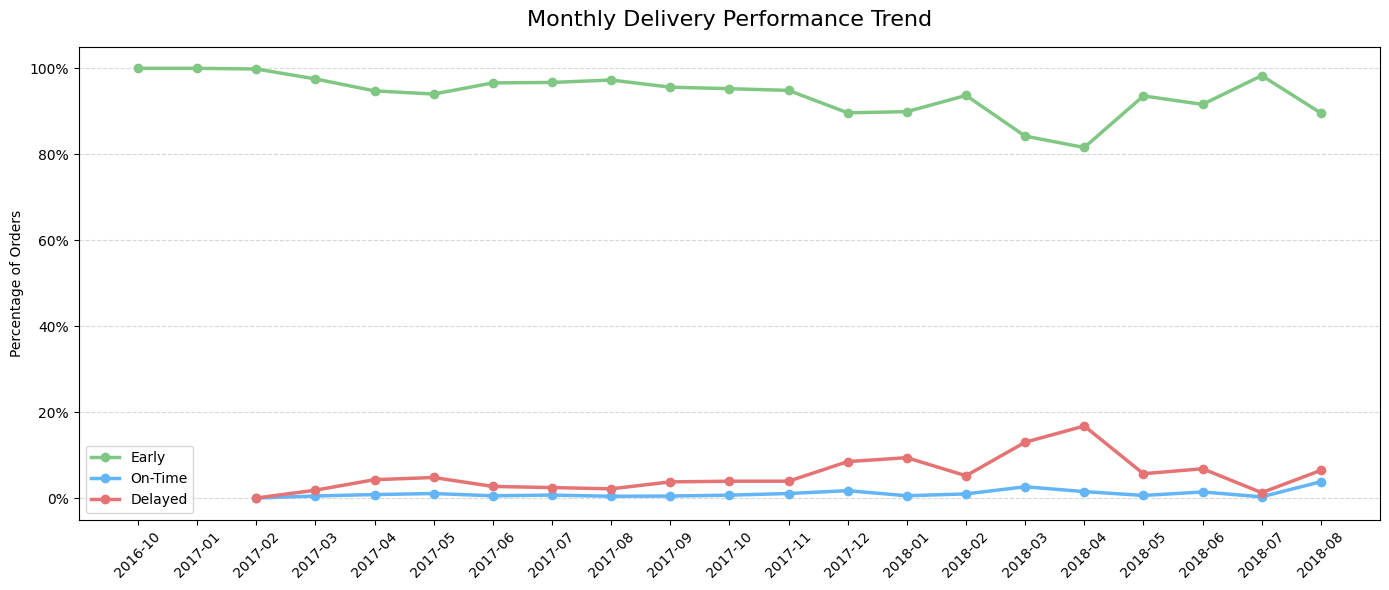

In [96]:
# Plot tren performa pengiriman seiring waktu
plt.figure(figsize=(14, 6))

for col, label, color in [
    ("Lebih Cepat", "Early", "#81C784"),
    ("Tepat Waktu", "On-Time", "#64B5F6"),
    ("Terlambat", "Delayed", "#E57373"),
]:
    plt.plot(
        delivery_pct_pivot.index,
        delivery_pct_pivot[col],
        marker='o',
        linewidth=2.5,
        label=label,
        color=color
    )

# Pengaturan dekorasi grafik
plt.title(
    "Monthly Delivery Performance Trend",
    fontsize=16,
    pad=15
)
plt.ylabel("Percentage of Orders")
plt.xlabel("")
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(
    lambda x, _: f"{x:.0%}"
)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


**Insight:**
- Pengiriman lebih cepat secara konsisten dalam selang waktu dua tahun mendominasi komposisi pengiriman bulanan, dengan proporsi berada di kisaran 90-100%. Adapun, pengiriman tepat waktu (on-time) berada pada proporsi yang sangat kecil dan relatif stabil sepanjang waktu.  
- Di sisi lain, keterlambatan pengiriman (delayed delivery) tetap menjadi fenomena minor namun konsisten, dengan proporsi umumnya berada di bawah 10%. Terdapat sedikit lonjakan keterlambatan pengiriman pada awal hingga pertengahan 2018, mengindikasikan adanya tekanan operasional sementara, seperti lonjakan volume, isu kapasitas, atau faktor eksternal (misalnya musim puncak).
- Secara keseluruhan, pola ini bersifat struktural dan non-musiman. Tidak terlihat pergeseran jangka panjang dari persentase pengiriman lebih cepet ke terlambat, hanya ada fluktuasi sementara pada bulan-bulan tertentu. Selain itu, dapat terlihat juga sistem logistik cenderung memberikan buffer waktu yang cukup sehingga mayoritas pesanan tiba lebih cepat dari estimasi.

#### Hubungan Ketepatan Waktu Pengiriman dan Skor Ulasan

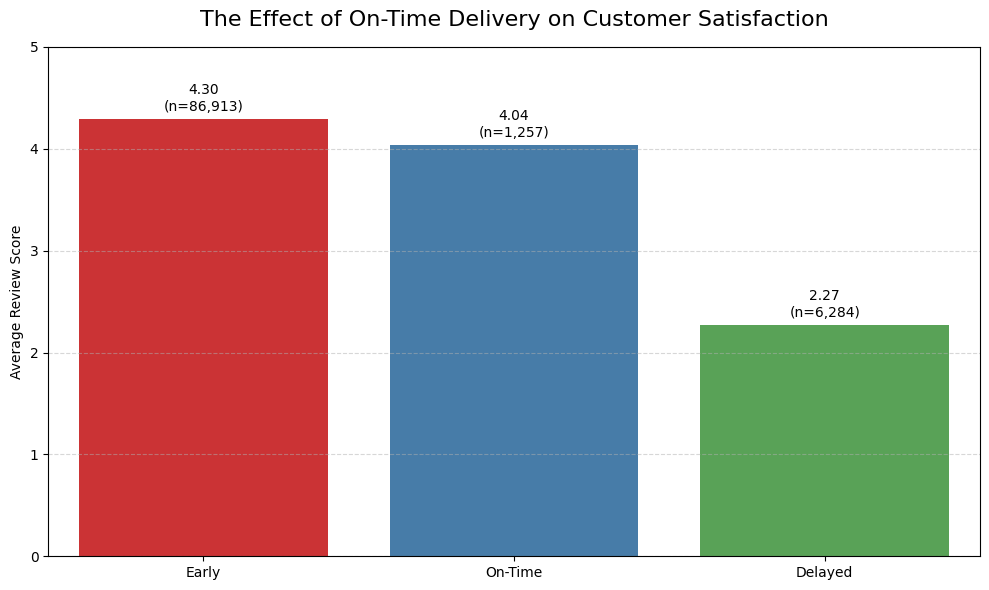

In [97]:
# Kelompokkan rata-rata skor review berdasarkan status pengiriman
# Simpan dalam variabel delivery_review
delivery_review = (
    orders_df_master
    .groupby('delivery_status')
    .agg(
        mean_score=('review_score', 'mean'),
        order_count=('order_id', 'nunique')
    )
    .reset_index()
)

# Plot rata-rata skor review berdasarkan status pengiriman
plt.figure(figsize=(10, 6), dpi=100)

ax = sns.barplot(
    data=delivery_review,
    x='delivery_status',
    y='mean_score',
    hue='delivery_status',
    errorbar=None,
    palette='Set1',
    legend=False
)

# Tambahkan anotasi angka skor dan jumlah order di atas setiap bar
for i, row in delivery_review.iterrows():
    ax.text(
        i,
        row['mean_score'] + 0.05,
        f"{row['mean_score']:.2f}\n(n={row['order_count']:,})",
        ha='center',
        va='bottom',
        fontsize=10
    )

# Pengaturan dekorasi grafik
plt.title(
    'The Effect of On-Time Delivery on Customer Satisfaction',
    fontsize=16,
    pad=15
)
plt.ylabel('Average Review Score')
plt.xlabel('')
plt.ylim(0, 5)
plt.xticks(
    ticks=[0, 1, 2],
    labels=['Early', 'On-Time', 'Delayed']
)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Insight:**
- Ketepatan waktu pengiriman memiliki pengaruh signifikan terhadap kepuasan pelanggan.

- Pesanan terlambat memiliki rata-rata skor 2,27. Sementara itu, pesanan yang dikirim tepat waktu dan lebih cepat memiliki skor ulasan di atas 4.

- Dampak negatif dari keterlambatan pengiriman terhadap skor ulasan jauh lebih besar dibandingkan dampak positif dari pengiriman lebih cepat, sehingga upaya pengurangan keterlambatan harus menjadi prioritas utama dalam strategi perbaikan logistik.


#### Hubungan Ketepatan Waktu Pengiriman dan Kategori Produk terhadap Skor Ulasan

In [98]:
# Ambil 5 kategori berdasarkan pesanan terbanyak sebagai index
# Simpan dalam variabel top_5_categories
top_5_categories = (
    orders_df_master
        .groupby("product_category_name_english")
        .order_id
        .nunique()
        .sort_values(ascending=False)
        .head(5)
        .index
)

# Kelompokkan rata-rata skor review pada tiap delivery status untuk masing-masing kategori
# Simpan dalam variabel category_delivery_review
category_delivery_review = (
    orders_df_master
        .groupby(["product_category_name_english", "delivery_status"])
        .agg(
            avg_review_score=("review_score", "mean"),
            order_count=("order_id", "nunique")
        )
        .reset_index()
)

# Filter data untuk top 5 kategori
category_delivery_review = (
    category_delivery_review[
      category_delivery_review["product_category_name_english"]
        .isin(top_5_categories)
    ]
)

category_delivery_review.head()

,product_category_name_english,delivery_status,avg_review_score,order_count
20,bed_bath_table,Lebih Cepat,4.152856,8284
21,bed_bath_table,Tepat Waktu,4.057851,120
22,bed_bath_table,Terlambat,2.225331,668
41,computers_accessories,Lebih Cepat,4.209032,5976
42,computers_accessories,Tepat Waktu,3.908046,86


In [99]:
# Pivot tabel sebagai tahap awal plotting
# Simpan dalam variabel heatmap_data
heatmap_data = (
  category_delivery_review
    .pivot(
      index="product_category_name_english",
      columns="delivery_status",
      values="avg_review_score"
    )
)

heatmap_data.head()

delivery_status,Lebih Cepat,Tepat Waktu,Terlambat
product_category_name_english,,,
bed_bath_table,4.152856,4.057851,2.225331
computers_accessories,4.209032,3.908046,2.278729
furniture_decor,4.209057,3.735632,2.333333
health_beauty,4.388896,4.248000,2.348509
sports_leisure,4.379913,4.202247,2.168378


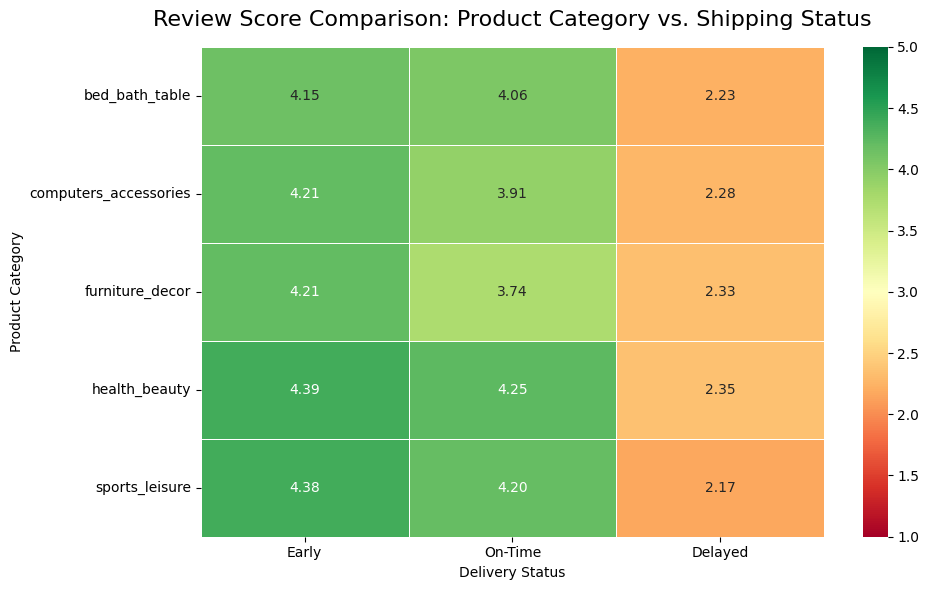

In [100]:
# Plot hubungan skor review dengan kategori produk dan status pengiriman
plt.figure(figsize=(10, 6))

sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap="RdYlGn",
    vmin=1,
    vmax=5,
    linewidths=0.5,
    linecolor="white"
)

# Pengaturan dekorasi grafik
plt.title(
    "Review Score Comparison: Product Category vs. Shipping Status",
    fontsize=16,
    pad=15
)
plt.xlabel("Delivery Status")
plt.ylabel("Product Category")
plt.xticks(
    ticks=[0.5, 1.5, 2.5],
    labels=['Early', 'On-Time', 'Delayed']
)
plt.tight_layout()
plt.show()


**Insight:**
- Dampak keterlambatan pengiriman terhadap kepuasan pelanggan konsisten dan signifikan di seluruh kategori produk, dengan rata-rata skor ulasan turun hingga 2 poin dibandingkan pengiriman tepat waktu atau lebih cepat. Tidak terdapat kategori yang relatif aman terhadap keterlambatan.

- Pengiriman lebih cepat vs tepat waktu hanya memberi kenaikan kecil pada skor ulasan (±0,1-0,3 poin). Artinya, pengiriman tepat waktu sudah cukup memenuhi ekspektasi pelanggan. Pengiriman lebih cepat tidak menaikkan kepuasan pelanggan secara signifikan. Terdapat faktor lain yang dapat mempengaruhi kepuasan pelanggan misalnya seperti kualitas produk, layanan pelanggan, ataupun kemudahan dalam bertransaksi.

- Perbedaan skor ulasan antar kategori jauh lebih kecil dibanding perbedaan ketepatan waktu pengiriman. Oleh karena itu, peningkatan kecepatan pengiriman perlu diprioritaskan untuk semua kategori produk.

### Pertanyaan 2: Berapakah ambang batas (threshold) rasio ongkos kirim terhadap harga total pesanan yang dapat ditoleransi pelanggan sebelum terjadi penurunan signifikan pada skor ulasan?

In [101]:
# Filter data dengan range freight to price ratio 0-100%
# Simpan dalam variabel filtered_data delivery_review_monthly category_delivery_review heatmap_data
filtered_data = (
    orders_df_master[orders_df_master['freight_ratio_bin'] != '>100%']
      .copy()
)

# Hapus kategori yang tidak terpakai
filtered_data['freight_ratio_bin'] = (
    filtered_data['freight_ratio_bin']
      .cat.remove_unused_categories()
)

# Kelompokkan rata-rata skor review pada tiap freight_ratio_bin
# Simpan dalam variabel ratio_analysis
freight_review = (
    filtered_data
      .groupby(by='freight_ratio_bin', observed=False)
      .agg(
        review_score=('review_score', 'mean'),
        order_count=('order_id', 'nunique')
      )
      .reset_index()
)

freight_review.head()

,freight_ratio_bin,review_score,order_count
0,0-10%,4.211734,14894
1,10-20%,4.176628,27075
2,20-30%,4.161476,19313
3,30-40%,4.119231,11480
4,40-50%,4.125923,6731


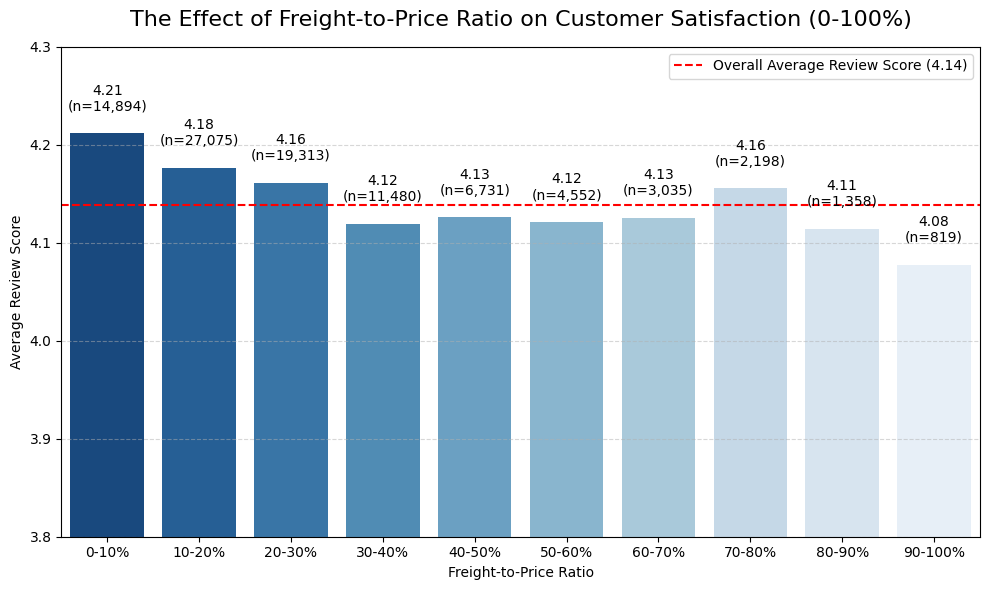

In [102]:
# Plot rata-rata skor review per kelompok rasio ongkos kirim
plt.figure(figsize=(10, 6))

ax = sns.barplot(
    data=freight_review,
    x='freight_ratio_bin',
    y='review_score',
    hue='freight_ratio_bin',
    errorbar=None,
    palette='Blues_r',
    legend=False
)

# Tambahkan anotasi angka skor dan jumlah order di atas setiap bar
for i, row in freight_review.iterrows():
    ax.text(
        i,
        row['review_score'] + 0.02,
        f"{row['review_score']:.2f}\n(n={row['order_count']:,})",
        ha='center',
        va='bottom',
        fontsize=10
    )

# Tambahkan garis benchmark
plt.axhline(
    freight_review['review_score'].mean(),
    color='red',
    linestyle='--',
    label=f"Overall Average Review Score ({(freight_review['review_score'].mean()):.2f})"
)

# Panggil fungsi legend agar label di atas muncul di grafik
plt.legend(loc='upper right', fontsize=10)


# Pengaturan dekorasi grafik
plt.title(
    'The Effect of Freight-to-Price Ratio on Customer Satisfaction (0-100%)',
    fontsize=16,
    pad=15
)
plt.xlabel('Freight-to-Price Ratio')
plt.ylabel('Average Review Score')
plt.ylim(3.8, 4.3) # Mempersempit range agar penurunan skor terlihat nyata
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Insight:**
- Secara keseluruhan, skor ulasan relatif stabil di atas 4 dengan penurunan yang gradual dengan semakin tingginya rasio ongkos kirim dan harga pesanan. Hal ini menunjukkan bahwa ongkos kirim mahal tidak secara langsung menurunkan kepuasan, selama masih berada dalam batas yang dianggap wajar oleh pelanggan.

- Pada rasio 0-30%, kepuasan pelanggan masih berada di atas rata-rata global (4,14). Penurunan yang cukup signifikan baru terjadi saat ongkos kirim  masuk ke rentang 30-40% (skor drop ke 4,12). Maka, terlihat rasio ongkos kirim  0-30% adalah zona "aman" karena berada di atas rata-rata, sedangkan rasio 30-70% adalah zona "waspada" karena berada di bawah standar kepuasan umum.

- Di rentang 70-80%, skornya naik lagi ke 4,16. Ini juga mengonfirmasi analisis kita sebelumnya bahwa pembeli di rentang ini kemungkinan besar adalah mereka yang memang sangat butuh atau membeli barang langka, sehingga mereka tetap memberikan rating tinggi meski ongkos kirim mahal.

Catatan: Order dengan rasio ongkos kirim >100% dikecualikan dari visualisasi
karena merupakan kasus ekstrem dan jumlahnya relatif kecil.

## Analisis Lanjutan (Opsional)

### Pertanyaan 3: Di wilayah mana keterlambatan pengiriman paling sering terjadi dan berdampak pada kepuasan pelanggan?

geolocation_zip_code_prefix
geo_df_grouped

In [103]:
# Gabungkan (join) data orders_df_master dan cust_df (ambil state pelanggan)
orders_df_cust = (
    orders_df_master
    .merge(
        cust_df[['customer_id', 'customer_state']],
        on='customer_id',
        how='left'
    )
)

orders_df_cust.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time_accuracy,delivery_status,...,review_answer_timestamp,product_id,seller_id,price,freight_value,freight_price_ratio,freight_ratio_bin,product_category_name_english,month,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,-8,Lebih Cepat,...,2017-10-12 03:43:48,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,29.076359,20-30%,housewares,2017-10,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,-6,Lebih Cepat,...,2018-08-08 18:37:50,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,19.174389,10-20%,perfumery,2018-08,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,-18,Lebih Cepat,...,2018-08-22 19:07:58,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22,12.020013,10-20%,auto,2018-08,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,-13,Lebih Cepat,...,2017-12-05 19:21:58,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.00,27.20,60.444444,60-70%,pet_shop,2017-12,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,-10,Lebih Cepat,...,2018-02-18 13:02:51,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,19.90,8.72,43.819095,40-50%,stationery,2018-02,SP


In [104]:
# Buat variabel baru delayed_state
# Filter data dengan delivery status terlambat dalam is_delayed
# Kelompokkan total order, jumlah delayed order, skor review berdasarkan customer state
# Hitung delayed rate
delayed_state = (
    orders_df_cust
    .assign(is_delayed=lambda x: x['delivery_status'] == 'Terlambat')
    .groupby('customer_state')
    .agg(
        total_orders=('order_id', 'nunique'),
        delayed_orders=('is_delayed', 'sum'),
        avg_review=('review_score', 'mean')
    )
    .assign(delayed_rate=lambda x: x['delayed_orders'] / x['total_orders'])
    .reset_index()
)

delayed_state.head()

,customer_state,total_orders,delayed_orders,avg_review,delayed_rate
0,AC,78,3,4.064103,0.038462
1,AL,390,82,3.840102,0.210256
2,AM,143,4,4.229167,0.027972
3,AP,66,2,4.242424,0.030303
4,BA,3187,383,3.933188,0.120176


In [105]:
# Hitung jumlah seller pada tiap state
seller_density_state = (
    sellers_df
    .groupby('seller_state')
    .agg(
        seller_count=('seller_id', 'nunique')
    )
    .reset_index()
)

seller_density_state.head()

,seller_state,seller_count
0,AC,1
1,AM,1
2,BA,19
3,CE,13
4,DF,30


In [106]:
# Load shapefile Brazil states
brazil_states = gpd.read_file(
    'https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson'
)

# Format kolom sigla menjadi huruf kapital semua
brazil_states['sigla'] = brazil_states['sigla'].str.upper()

In [107]:
# Gabungkan (join) data brazil_states dan delayed_state
geo_delayed = brazil_states.merge(
    delayed_state,
    left_on='sigla',
    right_on='customer_state',
    how='left'
)

geo_delayed.head()

,id,name,sigla,regiao_id,codigo_ibg,cartodb_id,created_at,updated_at,geometry,customer_state,total_orders,delayed_orders,avg_review,delayed_rate
0,1,Acre,AC,3,12,1,2015-02-09 16:46:01+00:00,2015-02-09 16:46:01+00:00,"MULTIPOLYGON (((-73.60818 -7.20194, -72.86963 ...",AC,78,3,4.064103,0.038462
1,2,Alagoas,AL,4,27,2,2015-02-09 16:46:01+00:00,2015-02-09 16:46:01+00:00,"MULTIPOLYGON (((-35.46516 -8.82549, -35.46626 ...",AL,390,82,3.840102,0.210256
2,3,Amazonas,AM,3,13,3,2015-02-09 16:46:01+00:00,2015-02-09 16:46:01+00:00,"MULTIPOLYGON (((-67.32553 2.03012, -67.32234 2...",AM,143,4,4.229167,0.027972
3,4,Amapá,AP,3,16,4,2015-02-09 16:46:01+00:00,2015-02-09 16:46:01+00:00,"MULTIPOLYGON (((-51.18168 4.00889, -51.179 3.9...",AP,66,2,4.242424,0.030303
4,5,Bahia,BA,4,29,5,2015-02-09 16:46:01+00:00,2015-02-09 16:46:01+00:00,"MULTIPOLYGON (((-39.2882 -8.5629, -39.28229 -8...",BA,3187,383,3.933188,0.120176


In [108]:
# Gabungkan (join) data brazil_states dan seller_density_state
geo_seller = brazil_states.merge(
    seller_density_state,
    left_on='sigla',
    right_on='seller_state',
    how='left'
)

geo_seller.head()

,id,name,sigla,regiao_id,codigo_ibg,cartodb_id,created_at,updated_at,geometry,seller_state,seller_count
0,1,Acre,AC,3,12,1,2015-02-09 16:46:01+00:00,2015-02-09 16:46:01+00:00,"MULTIPOLYGON (((-73.60818 -7.20194, -72.86963 ...",AC,1.0
1,2,Alagoas,AL,4,27,2,2015-02-09 16:46:01+00:00,2015-02-09 16:46:01+00:00,"MULTIPOLYGON (((-35.46516 -8.82549, -35.46626 ...",NaN,NaN
2,3,Amazonas,AM,3,13,3,2015-02-09 16:46:01+00:00,2015-02-09 16:46:01+00:00,"MULTIPOLYGON (((-67.32553 2.03012, -67.32234 2...",AM,1.0
3,4,Amapá,AP,3,16,4,2015-02-09 16:46:01+00:00,2015-02-09 16:46:01+00:00,"MULTIPOLYGON (((-51.18168 4.00889, -51.179 3.9...",NaN,NaN
4,5,Bahia,BA,4,29,5,2015-02-09 16:46:01+00:00,2015-02-09 16:46:01+00:00,"MULTIPOLYGON (((-39.2882 -8.5629, -39.28229 -8...",BA,19.0


In [109]:
# Ambil 3 baris data berdasarkan delayed rate tertinggi
# Simpan dalam variabel top_delayed_states
top_delayed_states = (
    geo_delayed
    .sort_values('delayed_rate', ascending=False)
    .head(3)
)

# Ambil 3 baris data berdasarkan penjual terbanyak
# Simpan dalam variabel top_delayed_states
top_seller_states = (
    geo_seller
    .sort_values('seller_count', ascending=False)
    .head(3)
)

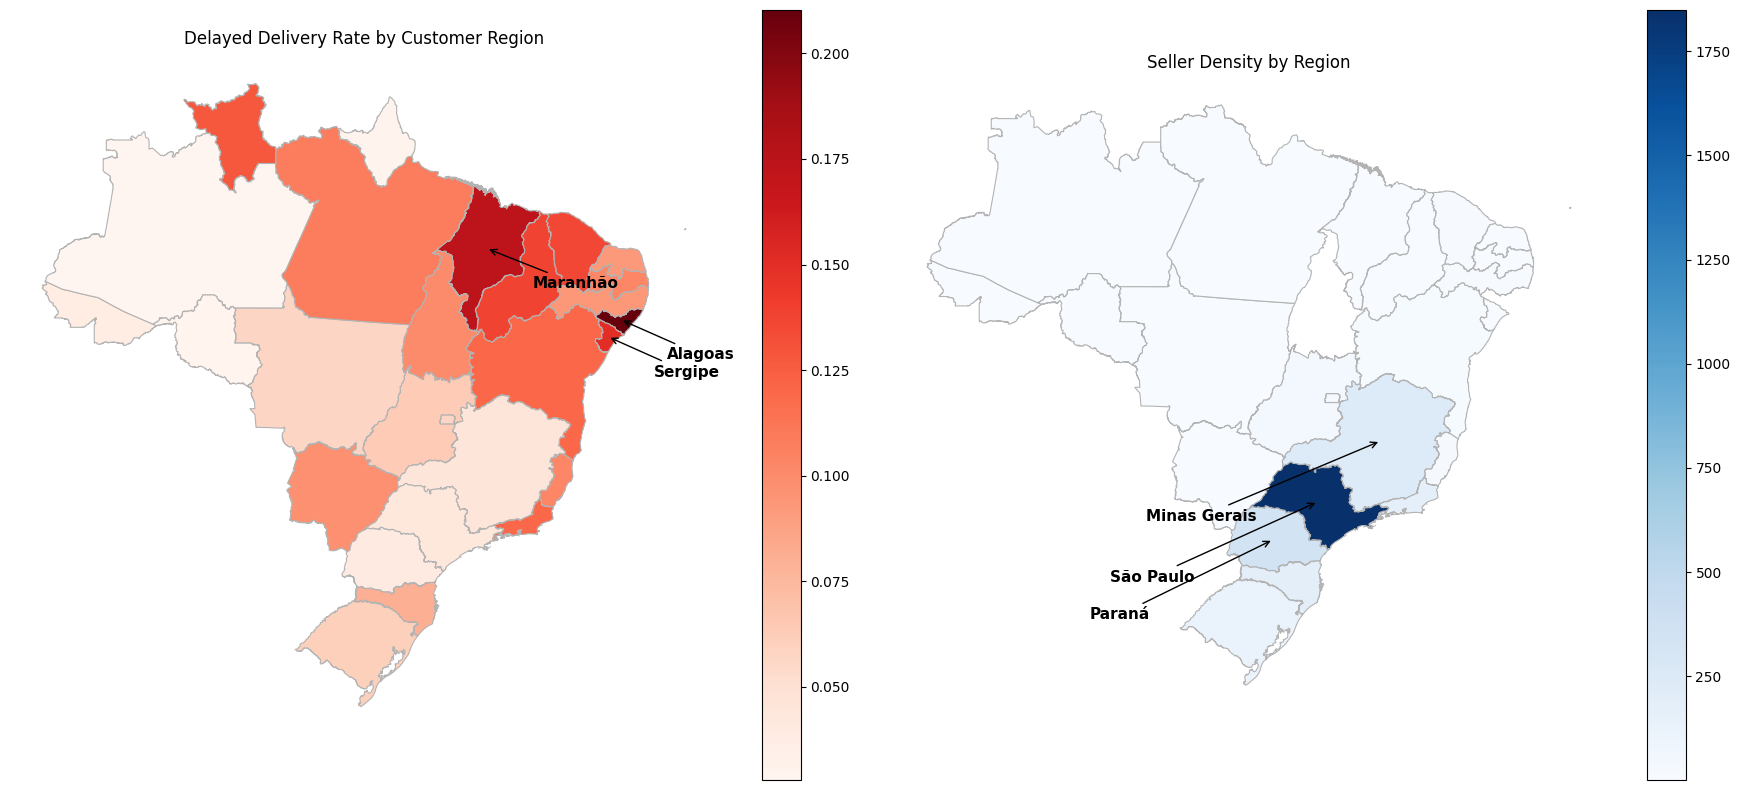

In [110]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot delayed delivery rate untuk tiap customer state
geo_delayed.plot(
    column='delayed_rate',
    cmap='Reds',
    linewidth=0.8,
    ax=axes[0],
    edgecolor='0.7',
    legend=True
)
axes[0].set_title('Delayed Delivery Rate by Customer Region')
axes[0].axis('off')

# Tambahkan anotasi nama state pada top 3 delayed state
for _, row in top_delayed_states.iterrows():
    centroid = row.geometry.centroid

    axes[0].annotate(
        text=row['name'],  # Nama state
        xy=(centroid.x, centroid.y),      # Titik tujuan (state)
        xytext=(centroid.x + 3, centroid.y - 2.5),  # Posisi teks (geser keluar)
        arrowprops=dict(
            arrowstyle="->",
            color="black",
            lw=1
        ),
        fontsize=11,
        fontweight='bold',
        ha='left'
    )

# Plot kepadatan seller untuk tiap customer state
geo_seller.plot(
    column='seller_count',
    cmap='Blues',
    linewidth=0.8,
    ax=axes[1],
    edgecolor='0.7',
    legend=True
)
axes[1].set_title('Seller Density by Region')
axes[1].axis('off')

# Tambahkan anotasi nama state pada top 3 seller density
for _, row in top_seller_states.iterrows():
    centroid = row.geometry.centroid

    axes[1].annotate(
        text=row['name'],
        xy=(centroid.x, centroid.y),
        xytext=(centroid.x - 8, centroid.y - 5),
        arrowprops=dict(
            arrowstyle="->",
            color="black",
            lw=1
        ),
        fontsize=11,
        fontweight='bold',
        ha='right',
    )


plt.tight_layout()
plt.show()


**Insight:**
- Tingkat keterlambatan tertinggi terkonsentrasi di wilayah Northeast (Maranhão, Alagoas, Sergipe), sementara kepadatan seller sangat terpusat di Southeast (São Paulo dan sekitarnya). Hal ini menunjukkan adanya ketimpangan geografis seller dan customer.

- Terindikasi bahwa tingginya keterlambatan pengiriman di wilayah Northeast berkorelasi dengan rendahnya kepadatan seller lokal dan jauhnya jarak rata-rata pengiriman dari wilayah Southeast. Analisis lanjutan diperlukan untuk menguji pengaruh jarak, ketersediaan seller lokal, dan karakteristik produk terhadap performa pengiriman.

## Conclusion

- Selama periode Oktober 2016-Agustus 2018, ketepatan waktu pengiriman terbukti konsisten dengan 90-100% pengiriman tiba lebih awal dari waktu estimasi. Akan tetapi, walaupun porsinya sedikit, keterlambatan pengiriman cukup memengaruhi kepuasan pelanggan. Secara umum, keterlambatan mengurangi skor kepuasan hingga ~47% (dari 4.30 ke 2.27). Pengiriman tepat waktu merupakan ekspektasi dasar, sementara pengiriman lebih cepat hanya memberikan nilai tambah yang relatif kecil terhadap kepuasan pelanggan. Sebaliknya, keterlambatan pengiriman menyebabkan penurunan kepuasan yang signifikan. Pola ini konsisten di seluruh kategori produk.

- Pelanggan masih dapat mentoleransi rasio ongkos kirim hingga sekitar 30% dari harga pesanan. Ketika biaya pengiriman melebihi 30% dari nilai pesanan, tingkat kepuasan pelanggan cenderung turun di bawah rata-rata global. Namun, dibandingkan ongkos kirim, ketepatan waktu pengiriman memiliki pengaruh yang jauh lebih besar terhadap kepuasan pelanggan.

- Ketimpangan geografis antara lokasi seller dan pelanggan mengindikasikannya sebagai salah satu faktor penyebab keterlambatan pengiriman. Perbedaan lokasi ini berpotensi meningkatkan jarak pengiriman dan kompleksitas logistik lintas wilayah. Kasus keterlambatan pengiriman terbesar datang dari bagian Northeast (Maranhão, Alagoas, Sergipe) sementara lokasi penjual terpusat di Southeast (São Paulo dan sekitarnya). Optimalisasi dan pemerataan lokasi penjual lintas wilayah merupakan peluang strategis untuk menurunkan risiko keterlambatan pengiriman, terutama pada area dengan permintaan tinggi namun kepadatan seller rendah, sehingga berdampak langsung pada peningkatan kepuasan pelanggan.



## Storing Data

In [111]:
orders_df_master.to_csv("orders_df_master.csv", index=False)
cust_df.to_csv("customers.csv", index=False)
sellers_df.to_csv("sellers.csv", index=False)